In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

import pickle

### Create target

In [24]:
with open('df_g_yellow.pkl','rb') as picklefile:
    df_yellow = pickle.load(picklefile)
with open('df_g_uber.pkl','rb') as picklefile:
    df_uber = pickle.load(picklefile)
with open('df_g_green.pkl','rb') as picklefile:
    df_green = pickle.load(picklefile)

In [25]:
df_yellow = df_yellow[['census_tract','rides']]
df_yellow.columns = ['census_tract','rides_yellow']
df_yellow.census_tract = df_yellow.census_tract.astype(int)
df_yellow.census_tract = df_yellow.census_tract.astype(str)

In [26]:
df_yellow.head()
df_yellow.shape

(2167, 2)

In [27]:
df_uber = df_uber[['census_tract','rides']]
df_uber.columns = ['census_tract','rides_uber']

In [28]:
df_uber.head()
# df_uber.shape

,census_tract,rides_uber
0,36005000200,7
1,36005000400,55
2,36005001600,94
3,36005001900,80
4,36005002000,21


In [29]:
df_green = df_green[['census_tract','ride']]
df_green.columns = ['census_tract','rides_green']

In [30]:
df_green.head()
df_green.shape

(2009, 2)

In [31]:
df = pd.merge(df_yellow, df_uber, on='census_tract', how='left')

In [32]:
df1 = pd.merge(df, df_green, on='census_tract', how='left')

In [33]:
df1['total_rides'] = df1.rides_uber + df1.rides_yellow + df1.rides_green
df1['share_yellow'] = df1.rides_yellow / df1.total_rides
df1['share_uber'] = df1.rides_uber / df1.total_rides
df1['share_green'] = df1.rides_green / df1.total_rides

In [35]:
df1.shape

(2167, 8)

In [36]:
df1.to_csv('taxi_data.csv')

In [13]:
uber_share = df1[['census_tract','share_uber']]

In [14]:
uber_share.isnull().sum()

census_tract      0
share_uber      177
dtype: int64

In [15]:
uber_share['census_tract'] = uber_share['census_tract'].astype(int)

/Users/THoshino/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [16]:
df_ct = pd.read_csv('geoid_census_tract.csv')
df = df_ct.drop(['INDEX', 'TRACT', 'STATE', 'COUNTY', 'LAT', 'LON'],axis=1)
df.head()

,GEOID
0,36005000100
1,36005000200
2,36005000400
3,36005001600
4,36005001900


In [17]:
# change this to left_on='GEOID' to update
df_t = pd.merge(left=df,right=uber_share, how='left',left_on='GEOID',right_on='census_tract')
df_t.drop('census_tract',axis=1,inplace=True)

In [18]:
df_t.head()

,GEOID,share_uber
0,36005000100,NaN
1,36005000200,0.522222
2,36005000400,0.542373
3,36005001600,0.885430
4,36005001900,0.421203


In [52]:
# def indicator(x):
#     if x >= 0.66:
#         return 1
#     else:
#         return 0

In [53]:
# df_t['target'] = df_t['share_uber'].apply(indicator)

In [54]:
# df_t.target.sum()

In [19]:
with open('target_for_model.pkl','wb') as picklefile:
    pickle.dump(df_t,picklefile)

In [25]:
share_sorted = uber_share.sort_values(by='share_uber',ascending=False)

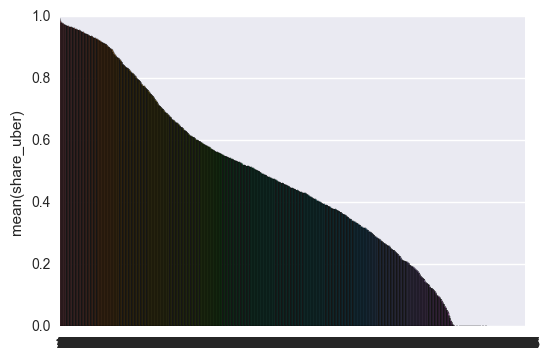

In [26]:
sns.barplot(list(range(len(share_sorted))),share_sorted.share_uber)

In [20]:
df_t

,GEOID,share_uber
0,36005000100,NaN
1,36005000200,0.522222
2,36005000400,0.542373
3,36005001600,0.885430
4,36005001900,0.421203
5,36005002000,0.857868
6,36005002300,0.610538
7,36005002400,0.480000
8,36005002500,0.856947
9,36005002701,0.812259


In [28]:
with open('target_for_model.pkl','wb') as picklefile:
    pickle.dump(df_t,picklefile)

In [22]:
df_t.to_csv('taxi_data.csv')